# PA 3: Evaluation and Comparison on Deep learning Models
Trina Brough Spring 2024

## 1. Understanding Evaluation Metrics (20 points)


### 1.1 Please explain the following commonly used evaluation metrics. (10 points)
- Accuracy: Accuracy is how often the model predicts the outcome correctly. It is the percentage correct calculated by: the number of samples correctly classified divided by the total number of samples. It answers the question: how often is the model right? Accuracy is simple to calculate and easy to understand but it is not very helpful if our classes are imbalanced or if what we really care about is predicting events that rarely occur.
- Precision: Precision measures how often a model correctly predicts the positive class out of the predicted positives. It is the percentage calculated by: the number of true positive predictions divided by the total number of positive predictions (both true and false). It answers the question: how often are the positive predictions correct? Precision addresses the problem that accuracy has when dealing with unbalanced classes. It is especially helpful when the cost of a false positive is high (but are okay if you miss some positives (false negatives)). Precision is best when we care more about "being right" than detecting them all.
- Recall: Recall measures how often a model correctly predicts the positive (true positives) out of all the actual positives. It is the percentage calculated by: the number of true positive predictions divided by the total number of positives (true positives plus false negatives). It answers the question: how well does a model find all instances of the positive class? Recall addressed the problem that accuracy has when dealing with unbalanced classes. It is especially helpful when the cost of a false negative is high (but are okay with some false positives). Recall is best when we care more about detecting them all than "being right".
- F1 Score: The F1 score is a way of averaging the precision and recall rates into one value. Because precision and recall are both rates, it creates this using the harmonic mean: 2 * (Precision * Recall) / (Precision + Recall). The result is a number between 0 and 1 that indicates how well a model classifies samples into their correct classes (0 being not classifying anything correctly and 1 being classifying all samples correctly). F1 scores is used to evaluate LLM accuracy as well as binary and multi-class classification problems (especially when classes are unbalanced). It is useful when wanting to account for both precision and recall and the costs of false negatives and false positives are relatively even. If one is more costly than the other, using straight precision or recall would be best.
- ROC Curve and AUC (Area Under the Curve): ROC is a graph that plots the True Positive Rate (Recall) on the y axis against the False Positive Rate (1 -  Precision, can be thought of as the "False Alarm Rate") on the x axis. The multiple curves are created for the classification model using different thresholds. These can then be compared on the ROC curve. The random baseline will be a straight line from the bottom left of the graph to the top right of the graph. The more the ROC curves upwards away from the baseline, the better the model is. (A perfect ROC curve would actually run staight up the y axis until 1, then turn right and run straight vertically). This upward curve is quantified by the AUC metric. It measures the area under the curve and allows us to determined which threshold is best (the largest AUC). 

### 1.2 Provide a practical scenario and explain which metric(s) should be chosen to assess the model performance in that scenario. (10 points)
Scenario: A binary classification model to identify tumors in mammogram images. The data used for this model would have unbalanced classes, since there are many more mammograms taken of healthy breast tissue than of tumors. (Of all women getting mammograms, only 0.5% have breast cancer). This means that accuracy would not be a good metric (we could classify as tumor-free every time and would be correct 99.5% of the time). We could choose to use the F1 score if the cost of false negatives and false positives is similar. However, in this case, a false positive means a woman would have the stress of coming in for more diagnostic testing but a false negative would prevent her from receiving possible life-saving treatment. The cost of a false negative is much higher than a false positive. In this case recall would be our most important metric. We want to make sure we detect all the true positives even if we end up with some false positives because lives are at stake. This isn't true without bounds, however. We could, in theory, classify every image as positive and we'd have 100% recall. This is the same problem as accuracy on the flip-side. This would result in a large cost (and stress) burden as women are re-tested unnecessarily. We might, therefore, want to plot this model using different thresholds on an ROC curve. We want to maximize our recall, which would induce us to perhaps over-categorize positives (perhaps adjusting our threshold more towards a positive classification). The ROC curves would allow us to compare the different thresholds while balancing our recall against the false positive rate. The AUC would quantify which threshold is best (in case it's not visually clear on the graph).)

## 2. Model Comparison (80 points)

### 2.1 Choose THREE commonly used deep-learning models and train these models for a specific task (e.g., image/text classification). (20 points)

To gain understanding of the metrics described above, I'd like to choose three image classification models that would likely use different metrics for evaluations. To that end, I will use:
- the MNIST as a multi-class image classification task with balanced classes. I will use the model we developed for PA 1.
- a binary classification task detecting tumors in brain MRI images (with unbalanced classes). For simplification (and because the purpose of this assignment is to analyze metrics), I will use the same model architecture for all three datasets.
- a binary classification task detecting real or altered face images (with balanced classes).

The main differences in these models are the costs of false positives versus false negatives. This affects which metric we want to give the most weight to.

### 2.2 Evaluate these models using appropriate metrics, and analyze the results. Complete this comparison using Jupyter Notebook. (40 points)

In [21]:
# Import necessary libraries
import torch
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os
from PIL import Image
import random
from torch.utils.data import random_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

#### Model 1: MNIST Multi-Class Classification - Balanced Classes

##### Load MNIST Dataset

In [3]:
# Load MNIST dataset

batch_size = 64
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# train data
train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test data
test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


##### Build MLP model for MNIST classification

In [4]:
# Build your Multi-Layer Perceptron (MLP) model

class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        # TODO: build layers here
        self.linear_RELU_stack = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(input_size, hidden_size), 
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, output_size)
        )
        

    def forward(self, x):
        # TODO: build the networks
        x = self.linear_RELU_stack(x)
        return x


##### Instantiate the model

In [5]:
def createModel (input_size, output_size, hidden_size = 528):
    return MLP(input_size, hidden_size, output_size)
    

In [6]:
# Instantiate the MLP model

input_size = 28 * 28  # what's input size? hints: flattened size for one instance
output_size = 10  # what's output size for this classification tasks?
model = createModel(input_size, output_size)

##### Definitions

In [11]:

learning_rate =  .001 # define your own learning rate here
criterion = torch.nn.CrossEntropyLoss()  # which loss function should we use here? Using Cross Entropy, online this is mentioned as a good loss function for MNIST categorization
optimizer = torch.optim.SGD (model.parameters(), lr = learning_rate)  # which optimizer do you use? Using Stochastic Gradient Descent  
    

##### Train Model

In [12]:
# Train the model

def train(train_loader, num_epochs, model_name):
    for i in range(num_epochs):
        epoch_loss = 0
        for X,y in train_loader: #loop through the batches created and train one batch at a time (enumerate a loader object return a tuple: (batch number, training data)
            #forward pass
            predictions = model_name(X)
            loss = criterion(predictions, y)
            #backpropagation
            loss.backward() #figure derivatives with respect to each parameter
            optimizer.step() #adjust the parameters using gradient descent
            optimizer.zero_grad() #clear out the derivative values computed in backward command
            epoch_loss += loss.item()
        print("In Epoch " + str(i+1) + "/" + str(num_epochs) + ", Train Loss: " + str(epoch_loss/len(train_loader))) #report average loss over all the batches     


In [13]:
num_epochs =  15 # feel free to change the number of training epochs
train(train_loader, num_epochs, model)

In Epoch 1/15, Train Loss: 2.1763683937505873
In Epoch 2/15, Train Loss: 1.742879759655324
In Epoch 3/15, Train Loss: 1.1609028750009882
In Epoch 4/15, Train Loss: 0.8077696417567573
In Epoch 5/15, Train Loss: 0.6393537460041961
In Epoch 6/15, Train Loss: 0.5477532577285888
In Epoch 7/15, Train Loss: 0.49127609969011504
In Epoch 8/15, Train Loss: 0.4530978308462385
In Epoch 9/15, Train Loss: 0.42576748166066497
In Epoch 10/15, Train Loss: 0.40533454487445764
In Epoch 11/15, Train Loss: 0.3890877126662462
In Epoch 12/15, Train Loss: 0.37602968601339154
In Epoch 13/15, Train Loss: 0.3652913567862277
In Epoch 14/15, Train Loss: 0.3560031023281597
In Epoch 15/15, Train Loss: 0.34809626845408603


##### Evaluate the Model

In [24]:

predictions_list = []
true_labels_list = []

with torch.no_grad():  # don't need to store gradients this time
    for X, y in test_loader:
        predictions = model(X)
        _, predicted = torch.max(predictions.data, 1)
        predictions_list.extend(predicted.tolist())
        true_labels_list.extend(y.tolist())

# Calculate metrics
test_accuracy = accuracy_score(true_labels_list, predictions_list) * 100
test_precision = precision_score(true_labels_list, predictions_list, average='micro') * 100
test_recall = recall_score(true_labels_list, predictions_list, average='micro') * 100
test_F1 = f1_score(true_labels_list, predictions_list, average='micro') * 100



print('Test Accuracy: %.2f %%' % test_accuracy)
print('Test Precision: %.2f %%' % test_precision)
print('Test Recall: %.2f %%' % test_recall)
print('Test F1: %.2f %%' % test_F1)

Test Accuracy: 90.45 %
Test Precision: 90.45 %
Test Recall: 90.45 %
Test F1: 90.45 %


###### Model Review
Since we have balanced classes and don't have any particular cost or risk difference between false positives and false negatives, accuracy is an appropriate metric to use in this case. With 10 balanced classes, our random baseline would be 10%. Our accuracy of 90% far exceeds our baseline, indicating good performance of this model. The high F1 score reflects our high precision and recall scores. It would indicate that this model performs well overall (that the accuracy isn't hiding the weaknesses of the model).

#### Model 2: Brain Tumor Binary Classification - Unbalanced Classes

##### Data Import and Preparation

In [25]:
#import brain tumor classification data from hugging face
from datasets import load_dataset

dataset = load_dataset("sartajbhuvaji/Brain-Tumor-Classification")

Found cached dataset imagefolder (C:/Users/trina/.cache/huggingface/datasets/sartajbhuvaji___imagefolder/sartajbhuvaji--Brain-Tumor-Classification-5ca63585a73c92fc/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


  0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 3264
    })
})

In [27]:

df = pd.DataFrame(dataset['train'])
df


,image,label
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
...,...,...
3259,<PIL.JpegImagePlugin.JpegImageFile image mode=...,3
3260,<PIL.JpegImagePlugin.JpegImageFile image mode=...,3
3261,<PIL.JpegImagePlugin.JpegImageFile image mode=...,3
3262,<PIL.JpegImagePlugin.JpegImageFile image mode=...,3


In [28]:
#Want this to be a binary classification - original labels are multi-class: 0, 1, 3 are types of tumors, 2 is no tumor
df['label'] = [1 if lbl == 2 else 0 for lbl in df['label']]


<Axes: xlabel='label'>

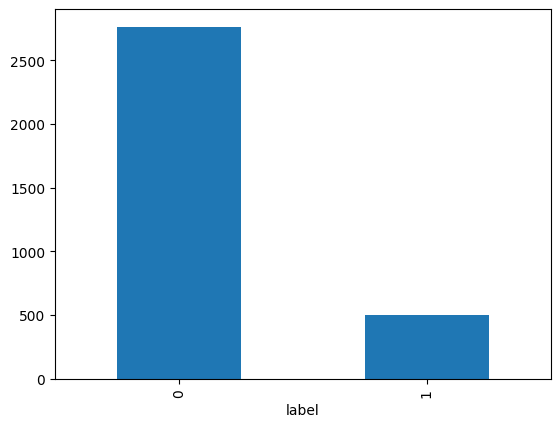

In [29]:
df['label'].value_counts().plot.bar()

In [30]:
classes = df['label'].value_counts()
baseline = classes[0] / classes.sum()
baseline

0.8468137254901961

Classes are imbalanced; 85% of our samples are of class 0. This will affect the metric we choose to use.

In [31]:
#Convert labels to tensor

# Extract the values from the column
labels = df['label'].values

# Convert the values to a PyTorch tensor
labels_tensor = torch.tensor(labels)


In [32]:
labels_tensor.unique()

tensor([0, 1])

In [33]:
#Convert images to a tensor
#My images are of varying size so need to resize, convert to a tensor and normalize
desired_height = 400
desired_width = 380
transform = transforms.Compose([
    transforms.Resize((desired_height, desired_width)),  # Resize the images to a common size
    transforms.ToTensor(),  # Convert PIL images to tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize the tensor values
])
images_tensor = torch.stack([transform(img) for img in df['image']])#transform each image then put all images into one tensor
images_tensor.shape

torch.Size([3264, 3, 400, 380])

In [34]:
#Split into training and test data sets and create dataLoader objects
batch_size = 64

train_images, test_images, train_labels, test_labels = train_test_split(images_tensor, labels_tensor, test_size=0.2, random_state=42)
train_dataset = TensorDataset(train_images, train_labels)
test_dataset = TensorDataset(test_images, test_labels)

# Create DataLoader objects for training and test data
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [35]:
# Instantiate model (use MLP defined above) and set definitions

input_size = 3 * desired_height * desired_width
output_size = 2  # binary classification
binary_model = createModel(input_size, output_size)
learning_rate =  .001 # define your own learning rate here
criterion = torch.nn.CrossEntropyLoss()  # which loss function should we use here? Using Cross Entropy, online this is mentioned as a good loss function for MNIST categorization
optimizer = torch.optim.SGD (binary_model.parameters(), lr = learning_rate)  # which optimizer do you use? Using Stochastic Gradient Descent  
  

In [36]:
#train model
num_epochs =  15 
train(train_loader, num_epochs, binary_model)

In Epoch 1/15, Train Loss: 0.4035233150168163
In Epoch 2/15, Train Loss: 0.3673373973224221
In Epoch 3/15, Train Loss: 0.35958609639144523
In Epoch 4/15, Train Loss: 0.3392814492307058
In Epoch 5/15, Train Loss: 0.32760148440919273
In Epoch 6/15, Train Loss: 0.3186838554172981
In Epoch 7/15, Train Loss: 0.3129821372468297
In Epoch 8/15, Train Loss: 0.2862768903738115
In Epoch 9/15, Train Loss: 0.2876650680129121
In Epoch 10/15, Train Loss: 0.2790474135701249
In Epoch 11/15, Train Loss: 0.26897032413540817
In Epoch 12/15, Train Loss: 0.26821200622291097
In Epoch 13/15, Train Loss: 0.24556905031204224
In Epoch 14/15, Train Loss: 0.24336820586425503
In Epoch 15/15, Train Loss: 0.24560526940153865


In [37]:
def evaluation(test_loader, model_name, average = 'binary'):
    predictions_list = []
    true_labels_list = []

    with torch.no_grad():  # don't need to store gradients this time
        for X, y in test_loader:
            predictions = model_name(X)
            _, predicted = torch.max(predictions.data, 1)
            predictions_list.extend(predicted.tolist())
            true_labels_list.extend(y.tolist())

    # Calculate metrics
    test_accuracy = accuracy_score(true_labels_list, predictions_list) * 100
    test_precision = precision_score(true_labels_list, predictions_list, average=average) * 100
    test_recall = recall_score(true_labels_list, predictions_list, average=average) * 100
    test_F1 = f1_score(true_labels_list, predictions_list, average=average) * 100

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(true_labels_list, predictions_list)
    roc_auc = auc(fpr, tpr)

    print('Test Accuracy: %.2f %%' % test_accuracy)
    print('Test Precision: %.2f %%' % test_precision)
    print('Test Recall: %.2f %%' % test_recall)
    print('Test F1: %.2f %%' % test_F1)
    print('ROC AUC: %.2f %%' % (roc_auc * 100))

    # Plotting ROC curve 
    import matplotlib.pyplot as plt

    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
            

Test Accuracy: 90.96 %
Test Precision: 69.23 %
Test Recall: 67.02 %
Test F1: 68.11 %
ROC AUC: 81.01 %


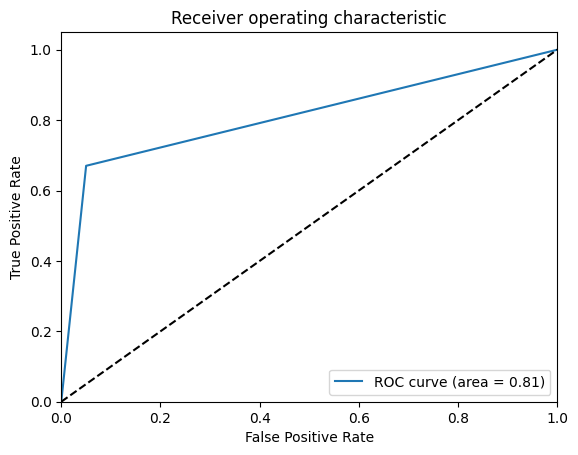

In [38]:
#evaluate model
evaluation(test_loader, binary_model)

This model is specifically trying to detect brain tumors based on MRI images. The classes are highly unbalanced (our baseline accuracy is 84.6 %). This model's accuracy is not much higher then our baseline, so it's possible that it mostly (but not entirely) learned to categorize all data as the majority class. Since there is a high cost to missing a brain tumor, we would prefer our model catch all positive (non-majority) cases (even if it falsely identifies some as positive). This means that recall would be a meaningful evaluation metric for us. A recall of 68% indicates that this model only identifies 68% of the actual positives as positive (thus missing the cancer in 32% of the people scanned). This would be disastrous and would rule out this model (at least without serious modification). There is also some justification to look at the precision metric. Receiving a false positive would lead to additional expensive testing as well as a significate amount of stress to the patients. While I believe recall is more pressing (making sure we don't miss any positives), there is still a cost associated with false positives. A precision of 69% indicates that when we predict positive, we are correct 69% of the time. This again shows this to be a poor model. This is a good example of a model that has a pretty high accuracy metric but that wouldn't be a good model for the circumstances.

#### Model 3: Real or Fake Face Detection
For this computer vision task, a model needs to detect whether an image is real or has been manipulated. Applications of this type of model could be in fraud detection and security.

In [39]:
def import_images(image_folder, class_label):
    transform = transforms.ToTensor()
    jpeg_files = [file for file in os.listdir(image_folder) if file.endswith('.jpg')]
    
    # Create an empty list to store tuples of (image_tensor, class_label)
    ImageClassList = []
    
    # Iterate over the JPEG files, open each image, convert it to a tensor, and append it to the list with its class label
    for file in jpeg_files:
        file_path = os.path.join(image_folder, file)
        img = Image.open(file_path)
        img_tensor = transform(img)
        ImageClassList.append((img_tensor, class_label))
    
    return ImageClassList

In [49]:
fakeImages = import_images("real_and_fake_face/training_fake", 0)

In [50]:
realImages = import_images("real_and_fake_face/training_real", 1)

In [51]:
numFake = len(fakeImages)
numReal = len(realImages)
print("Number of real images: " + str(numReal))
print("Number of fake images: " + str(numFake))
print ("Baseline: " + str(numFake / (numFake + numReal)))

Number of real images: 1081
Number of fake images: 960
Baseline: 0.47035766780989713


Our classes are relatively balanced with a baseline of 47%.

In [52]:
# Combine the fake and real images lists
all_images = fakeImages + realImages

# Shuffle the combined list
random.shuffle(all_images)

# Define the ratio for splitting the dataset (e.g., 80% for training, 20% for testing)
train_ratio = 0.8
test_ratio = 1 - train_ratio

# Calculate the sizes of the training and testing sets
train_size = int(train_ratio * len(all_images))
test_size = len(all_images) - train_size

# Split the dataset into training and testing sets
train_set = all_images[:train_size]
test_set = all_images[train_size:]

# Extract images and labels from the sets
train_images = torch.stack([data[0] for data in train_set])
train_labels = torch.tensor([data[1] for data in train_set])
test_images = torch.stack([data[0] for data in test_set])
test_labels = torch.tensor([data[1] for data in test_set])

# Create TensorDatasets
train_dataset = TensorDataset(train_images, train_labels)
test_dataset = TensorDataset(test_images, test_labels)

# Define batch size
batch_size = 64

# Create DataLoader for training and testing sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [53]:
# Instantiate model (use MLP defined above) and set definitions

input_size = 3 * 600 * 600
hidden_size = 528 
output_size = 2  # binary classification
face_model = createModel(input_size, output_size)
learning_rate =  .001 # define your own learning rate here
criterion = torch.nn.CrossEntropyLoss()  # which loss function should we use here? Using Cross Entropy, online this is mentioned as a good loss function for MNIST categorization
optimizer = torch.optim.SGD (face_model.parameters(), lr = learning_rate)  # which optimizer do you use? Using Stochastic Gradient Descent  
  

In [54]:
#train model
num_epochs =  10 
train(train_loader, num_epochs, face_model)

In Epoch 1/10, Train Loss: 0.697201866369981
In Epoch 2/10, Train Loss: 0.6886307184512799
In Epoch 3/10, Train Loss: 0.6895672357999362
In Epoch 4/10, Train Loss: 0.6799631944069495
In Epoch 5/10, Train Loss: 0.6806209201996143
In Epoch 6/10, Train Loss: 0.6653236081966987
In Epoch 7/10, Train Loss: 0.6712216826585623
In Epoch 8/10, Train Loss: 0.6655857700567979
In Epoch 9/10, Train Loss: 0.6580174427766067
In Epoch 10/10, Train Loss: 0.6641511940039121


Test Accuracy: 59.66 %
Test Precision: 60.48 %
Test Recall: 69.12 %
Test F1: 64.52 %
ROC AUC: 59.04 %


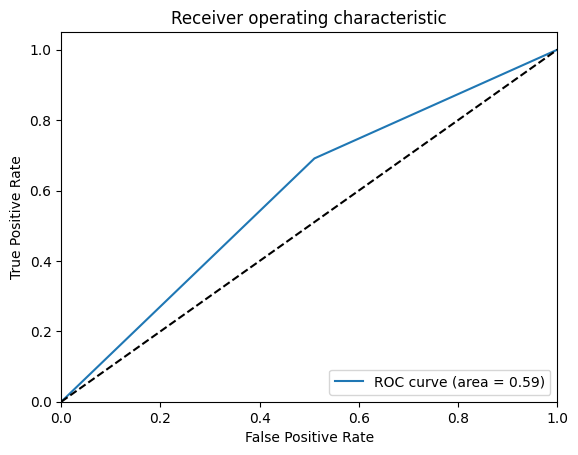

In [55]:
#evaluate model
evaluation(test_loader, face_model)

Our classes are balanced in this case (with a baseline of 47%). Accuracy beat our baseline slightly but still isn't very encouraging for this model. However, I think precision is likely the most valuable metric here if we're using this type of classification for any type of security. We want to make sure if we classify this image as real that it's really real. Our precision metric indicates that when we say an image is real, we are right 60% of the time. If this type of model were used for my phone's face recognition, it would let people with the wrong face in 40% of the time which would be ineffectual security. Since the cost of being wrong when we classify it as real is very high, precision is the number we'd want to pay the most attention to. 


### 2.3 Discuss the potential shortcomings of the metrics that you choose. What’s the possible solutions to improve the shortcomings? (20 points)

- I chose accuracy as my metric of choice for the first model. I felt it was appropriate due to our balanced classes and equal risk regarding the classification. Since accuracy can be high (especially with unbalanced classes) while other metrics are low, it seems a good idea to check them all (or know when to disregard accurcy). For example, if I used accuracy for my second model I wouldn't recognize how poorly the model was performing at not missing the true class, which is much more important in this case. Overall, the shortcomings of accuracy include: overinflating the model's performance with unbalanced class and not taking into account the different weights associated with the mislabeling.
- I chose recall as my metric of choice for the second model. I did this due to the high cost of missing a true positive. However, doing this doesn't account for the cost of false positives, which also should be considered in a medical diagnosis case. I would account for this by considering both recall and precision (and their combined F1) when evaluating models. Since this model was unbalanced it could also be effective to see if we changed the threshold for classification if it would improve our results. We could check this using an ROC curve.
- In my last model, I chose precision as the most important metric. In cases of security, the cost of misdiagnosing a fraudulant action is high. Precision says how many that I classify as true are really true? The downside of using precision alone is that pushed to an extreme, the model would just want to classify everything as 0. If it doesn't ever classify a 1, it isn't ever wrong and has perfect precision. To counter this, other metrics should be considered. F1 represents more of a balance between precision and recall. In the case where the model classifies everything as 0, it would have perfect precision but terrible recall (how many of the true 1s did we capture? None of them!). By considering the F1 as well as precision, we could find the right balance.

Overall, the downside of each metric is mostly represented in another metric. I learned that it's important to know what metric we should key and focus on, but we wouldn't want to completely ignore the others. I also recognized how essential domain knowledge is. We must know the business (or human) cost of misclassifying. They aren't the same from situation to situation. And lastly, properly addressing imbalanced classes is vital to creating and evaluating models.

Sources:
- "Accuracy vs. precision vs. recall in machine learning: what's the difference?" https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall#:~:text=Accuracy%20is%20a%20metric%20that,often%20the%20model%20is%20right%3F
- "Understanding and Applying F1 Score: AI Evaluation Essentials with Hands-On Coding Example" https://arize.com/blog-course/f1-score/#:~:text=F1%20score%20is%20often%20preferred,number%20of%20non%2Dspam%20emails.
- "How to explain the ROC curve and ROC AUC score?" https://www.evidentlyai.com/classification-metrics/explain-roc-curve
- "What Percentage of Abnormal Mammograms Are Cancer?" https://www.medicinenet.com/what_percentage_of_abnormal_mammograms_are_cancer/article.htm
- Dataset: "sartajbhuvaji/Brain-Tumor-Classification" https://huggingface.co/datasets/sartajbhuvaji/Brain-Tumor-Classification
- Seonghyeon Nam, Seoung Wug Oh, Jae Yeon Kang, Chang Ha Shin, Younghyun Jo, Young Hwi Kim, Kyungmin Kim, Minho Shim, Sungho Lee, Yunji Kim, Suho Han, Gunhee Nam, Dasol Lee, Subin Jeon, In Cho, Woongoh Cho, Sejong Yang, Dongyoung Kim, Hyolim Kang, Sukjun Hwang, and Seon Joo Kim. (2019, January). Real and Fake Face Detection, Version 1. Retrieved 4/1/2024 from https://www.kaggle.com/datasets/ciplab/real-and-fake-face-detection.
- https://chat.openai.com/ and https://www.blackbox.ai/chat/expert-python for coding help